In [30]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle


In [31]:
from data_Fullset import SCxL23 as exppar


In [32]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [33]:
for key in data.keys():
    print(key,":",data[key].shape)

#Sp : (390,)
#Bch : (390,)
Dsb : (390,)
Dss : (390,)
d_interSp : (390,)
Vtot : (390,)
Vh : (390,)
Ln : (390,)
SA : (390,)
nPSD : (390,)
A1 : (390,)
A2 : (390,)
GPHN_SNR : (390,)
DiS-EMchk : (390,)
Lneck : (390,)
maxDneck : (390,)
minDneck : (390,)
meanDneck : (390,)
Rneck : (390,)
Lhead : (390,)
maxDhead : (390,)
minDhead : (390,)
meanDhead : (390,)
Ah : (390,)
Rhead : (390,)
meanDneck_trunc70pc : (390,)


In [34]:
import pandas as pd

In [35]:
gAMPA = pd.DataFrame((data['A1']*exppar.gtrA)*1e3)
gNMDA = pd.DataFrame((data['A1']*exppar.gtrN)*1e3)

print(gAMPA.describe())
print(gNMDA.describe())

               A1
count  384.000000
mean     0.419623
std      0.399813
min      0.034957
25%      0.141048
50%      0.282883
75%      0.561287
max      2.880531
               A1
count  384.000000
mean     0.371205
std      0.353681
min      0.030924
25%      0.124773
50%      0.250243
75%      0.496523
max      2.548162


In [36]:
.400/sqrt(390)

0.020254787341673335

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aa1f66208>]],
      dtype=object)

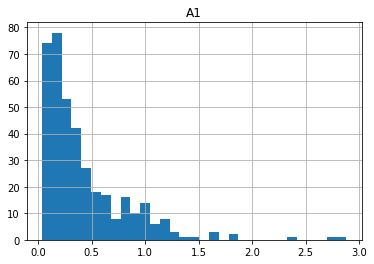

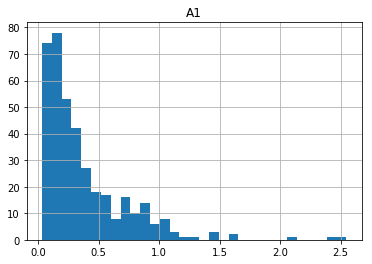

In [37]:
gAMPA.hist(bins=31)
gNMDA.hist(bins=31)

In [38]:
lab_Linear_dims = ['Lhead','maxDhead','minDhead','meanDhead']
lab_2d_dims = ['Ah']
lab_3d_dims = ['Vh']
#shrinkage_factor = 1./1.56999
shrinkage_factor = 1./1.485

In [39]:

spdata = data.copy()
for l in lab_Linear_dims:
    spdata[l] = data[l]/shrinkage_factor**(1.0/2.0)
#for l in lab_2d_dims:
#Change this to have A1 and A2 fixed
A2f = data['A2']
A2f[isnan(A2f)] = 0.0
A1f = data['A1']
A1f[isnan(A1f)] = 0.0

Ahfree = data['Ah']-A2f-A1f
Ahfree = Ahfree/shrinkage_factor
spdata['Ah'] = Ahfree+A2f+A1f

for l in lab_3d_dims:
    spdata[l] = data[l]/shrinkage_factor**(3.0/2.0)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
# diameter dendrite  0.7/.75**(1./2.0)
print('Shrunk diameter',0.65)
print('Shrinkage corrected diameter',0.65/shrinkage_factor**(1.0/2.0))

Shrunk diameter 0.65
Shrinkage corrected diameter 0.7920937444520062


In [41]:
#Discarding two problematic nonDiS
sel = arange(spdata['nPSD'].shape[0])[((~(spdata['nPSD']==2.0))*(spdata['A2']>0))]
spdata['A2'][sel] *= 0.0

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
with open("data_Fullset/Fullset_shrnk_corrected.pkl","wb") as f:
    pickle.dump(spdata,f)

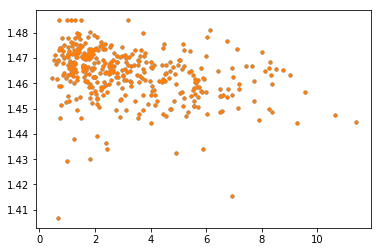

In [43]:
plot(data['Ah'],(Ahfree+A1f+A2f)/data['Ah'],'.')
plot(data['Ah'],spdata['Ah']/data['Ah'],'.')

**Note** Keep in mind this is for the ammount of membrane of the active dendrite. It has to be corrected if we consider shrinkage!

In [44]:
rhosp = 1.3
diamneck = spdata['meanDneck'].mean()/1e3
dendareaperL = rhosp*(mean(spdata['Ah'])+(pi*diamneck))
denddiam = 0.87
factor = dendareaperL/(pi*denddiam)
print(factor)
factorsp = factor
factordd = (pi*denddiam-(pi*diamneck**2/4.0)*rhosp)/(pi*denddiam)
print(factordd,factordd+factorsp)


2.554931685239178
0.977717679443588 3.532649364682766


In [45]:
with open("data_Fullset/shPSD_Morphometry.pkl","rb") as f:
    datash = pickle.load(f)

In [46]:
datash

,A,Dpb,Dps
shPSD_ID,,,
180618Lmoz3_1,0.264371,21.148512,53.880635
180618Lmoz3_2,0.091982,25.985787,58.717910
180618Lmoz3_3,0.199327,29.640078,62.372200
180618Mmoz3_1-1_shPSD1,0.108019,2.700000,54.077000
180618Mmoz3_1-1_shPSD2,0.264497,3.696448,55.073448
180618Mmoz3_1-1_shPSD3,0.140767,6.122697,57.499697
180618Mmoz3_1-2_shPSDA,0.114171,10.618761,61.995761
180618Mmoz3_2-1_shPSDC,0.134315,16.223004,67.600004
180618Mmoz3_2-2_shPSDB,0.160663,18.275345,69.652345


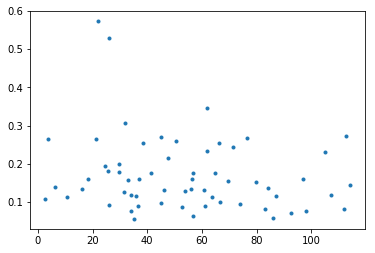

In [47]:
plot(datash['Dpb'],datash['A'],'.')

In [48]:
arange(61)[datash['Dps']>160]

array([], dtype=int64)

In [49]:
gGABA = pd.DataFrame((datash['A']*exppar.gtrG)*1e3)
gGABA.describe()

,A
count,61.000000
mean,1.000000
std,0.577148
min,0.328792
25%,0.632949
50%,0.850551
75%,1.257237
max,3.357836


In [29]:
gGABADiS = pd.DataFrame((data['A2'][data['A2']>0]*exppar.gtrG)*1e3)
gGABADiS.describe()

,A2
count,37.000000
mean,0.527511
std,0.277050
min,0.185705
25%,0.329125
50%,0.479948
75%,0.618991
max,1.560619


NameError: name 'dendsh' is not defined